In [16]:
# importing libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [17]:
# loading data...
data = pd.read_csv('train_gd.csv')

In [18]:
# create x and y - predicting house price from area 
x = data['GrLivArea']
y = data['SalePrice']

# normalize data to make the gradient descent computation easier 
x = (x - x.mean()) / x.std() # can also divide by range 

# add a column of ones to x for intercept by keeping same dimensions
x = np.c_[np.ones(x.shape[0]), x]

In [19]:
# defining algo. for GRADIENT DESCENT

alpha = 0.01 # Step size - learning rate
iterations = 2000 # No. of iterations to run the algo.
m = y.size # No. of data points
np.random.seed(123) # Set the seed - for repeatability
theta = np.random.rand(2) # Pick some random values to start with


# GRADIENT DESCENT 
def gradient_descent(x, y, theta, iterations, alpha):
    past_costs = []
    past_thetas = [theta]
    for i in range(iterations):
        prediction = np.dot(x, theta) # x and coefficient estimates
        error = prediction - y # diff in predicted and actual values of house price
        cost = 1/(2*m) * np.dot(error.T, error) # for minimization
        past_costs.append(cost)
        theta = theta - (alpha * (1/m) * np.dot(x.T, error)) # calculating...
        past_thetas.append(theta)
        
    return past_thetas, past_costs

# getting new values back for theta and costs
past_thetas, past_costs = gradient_descent(x, y, theta, iterations, alpha)
theta = past_thetas[-1]

# print the results...
printing("Gradient Descent: {:.2f}, {:.2f}".format(theta[0], theta[1]))

Gradient Descent: 180921.20, 56294.90


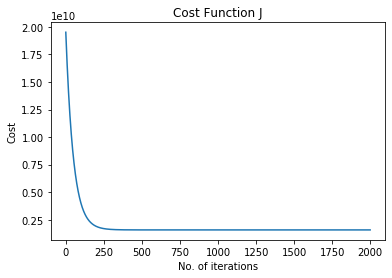

In [20]:
# plotting the cost function to check if alpha is high or low ie. diverging or convergin slowly
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

For animation refer: https://www.kaggle.com/ronaldtroncoso20/global-terrorism-trends-animation

In [21]:
# Animation code

# set the plot
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color='red')
line, = ax.plot([], [], lw=2)
annotation = ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

# generating the animation data
def init():
    line.set_data([], [])
    annotation.set_text('')
    return line, annotation

# animation function
def animate(i):
    x = np.linspace(-5, 20, 1000)
    y = past_thetas[i][1]*x + past_thetas[i][0]
    line.set_data(x, y)
    annotation.set_text('Cost = %.2f e10' % (past_costs[i]/10000000000))
    return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=300, interval=0, blit=True)

anim.save('animation.gif', writer='imagemagick', fps = 30)

MovieWriter imagemagick unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.



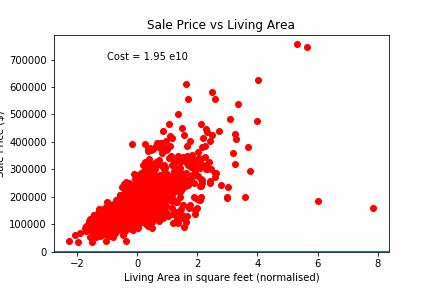

In [22]:
# displaying the animation...
import io
import base64
from IPython.display import HTML

filename = 'animation.gif'

video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:image/gif;base64,{0}" type="gif" />'''.format(encoded.decode('ascii')))